In [1]:
import rasterio
import rasterio.features
import rasterio.warp

In [2]:
arquivo_raster = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/4_Códigos/Qualificação/14_106.tif'

In [12]:
with rasterio.open(arquivo_raster) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()
    banda1 = dataset.read(1)

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[-46.573727, -23.518705], [-46.575232, -23.64482], [-46.394885, -23.646547], [-46.393552, -23.520422], [-46.573727, -23.518705]]]}


A dataset band is an array of values representing the partial distribution of a single variable in 2-dimensional (2D) space. All band arrays of a dataset have the same number of rows and columns.

In [4]:
dataset.width

631

In [5]:
dataset.height

479

Some dataset attributes expose the properties of all dataset bands via a tuple of values, one per band. To get a mapping of band indexes to variable data types, apply a dictionary comprehension to the zip() product of a dataset’s indexes and dtypes attributes.

In [6]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'float64'}

A GIS raster dataset is different from an ordinary image; its elements (or “pixels”) are mapped to regions on the earth’s surface. Every pixels of a dataset is contained within a spatial bounding box.

In [7]:
dataset.bounds

BoundingBox(left=339331.0, bottom=7384210.0, right=357730.3921, top=7398177.2089)

In [8]:
dataset.transform

Affine(29.1591, 0.0, 339331.0,
       0.0, -29.1591, 7398177.2089)

In [9]:
dataset.crs

CRS.from_epsg(31983)

In [10]:
dataset.indexes

(1,)

In [13]:
banda1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

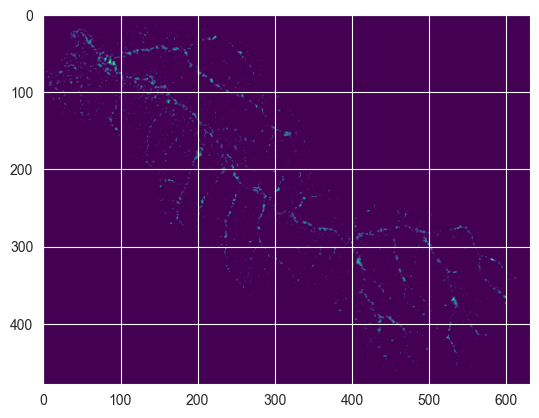

In [17]:
from matplotlib import pyplot as plt
dataset = rasterio.open(arquivo_raster)
plt.imshow(dataset.read(1), cmap='viridis')
plt.show()

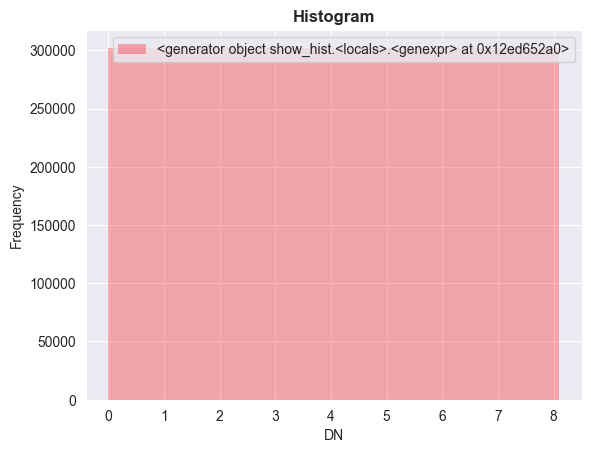

In [20]:
from rasterio.plot import show_hist
show_hist(
    dataset, bins=1, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [21]:
dataset.shape

(479, 631)

In [22]:
dataset.dtypes

('float64',)

In [23]:
dataset.nodatavals

(None,)

In [24]:
dataset.nodata

In [25]:
msk = dataset.read_masks(1)
msk.shape
msk

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

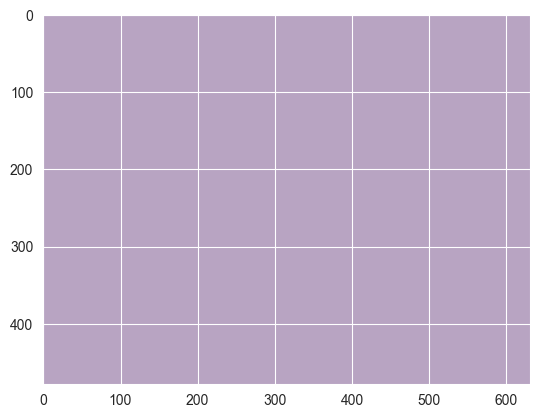

In [27]:
plt.imshow(msk, alpha=0.3, cmap='viridis')

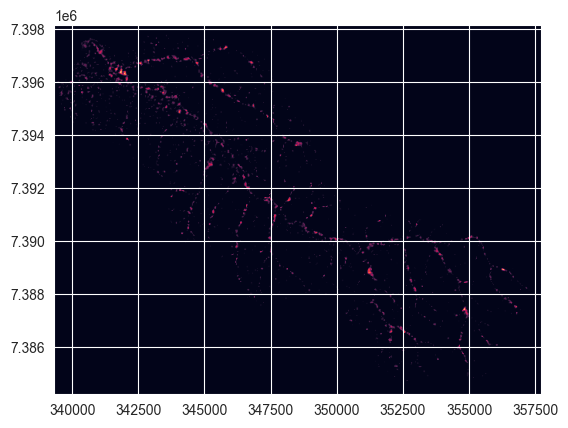

<Axes: >

In [28]:
rasterio.plot.show(dataset)

In [29]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 631,
 'height': 479,
 'count': 1,
 'crs': CRS.from_epsg(31983),
 'transform': Affine(29.1591, 0.0, 339331.0,
        0.0, -29.1591, 7398177.2089)}